In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

### Загрузка обучающих и тестовых данных

The CIFAR-100 dataset (Canadian Institute for Advanced Research, 100 classes) is a subset of the Tiny Images dataset and consists of 60000 32x32 color images. The 100 classes in the CIFAR-100 are grouped into 20 superclasses.

In [39]:
 (train_images,train_labels),(test_images,test_labels)= datasets.cifar100.load_data()

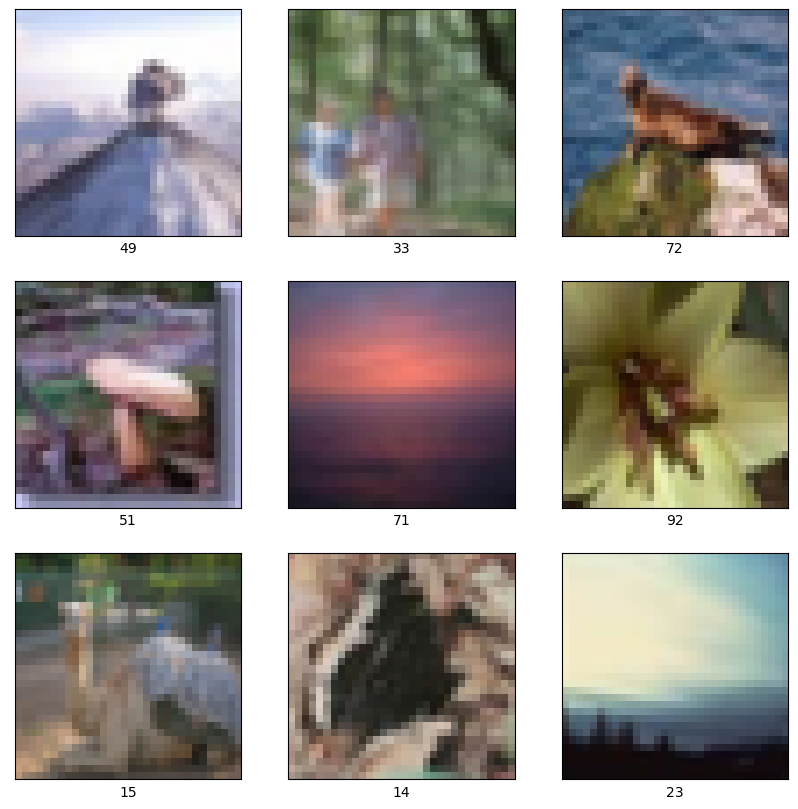

In [40]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  plt.xlabel(test_labels[i][0])
plt.show()

In [41]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [42]:
train_images, test_images = train_images/255.0, test_images/255.0

### Обычная нейросеть

In [46]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

In [89]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 2, 2, 128)       

In [48]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
              )

In [49]:
hist = model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 14ms/step - loss: 3.9513 - accuracy: 0.0885
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 3.2816 - accuracy: 0.2005
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 2.9359 - accuracy: 0.2671
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 2.6880 - accuracy: 0.3148
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.5051 - accuracy: 0.3515
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.3489 - accuracy: 0.3860
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.2232 - accuracy: 0.4134
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.1079 - accuracy: 0.4408
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.0043 - accuracy: 0.4606
Epoch 10/10
1563/1563 [==============================] - 37s 24m

In [50]:
hist.history

{'loss': [3.9513189792633057,
  3.2815749645233154,
  2.93589448928833,
  2.6880438327789307,
  2.5051188468933105,
  2.348907947540283,
  2.223202705383301,
  2.1079416275024414,
  2.0042669773101807,
  1.9026551246643066],
 'accuracy': [0.08845999836921692,
  0.20054000616073608,
  0.2671000063419342,
  0.3148399889469147,
  0.3514600098133087,
  0.38600000739097595,
  0.41335999965667725,
  0.44078001379966736,
  0.4606199860572815,
  0.4834800064563751]}

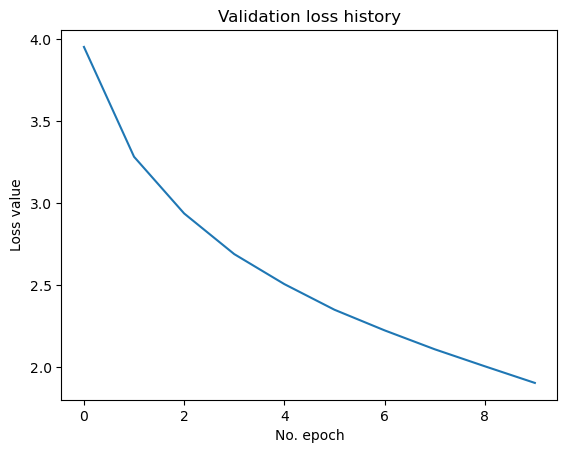

In [51]:
plt.plot(hist.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

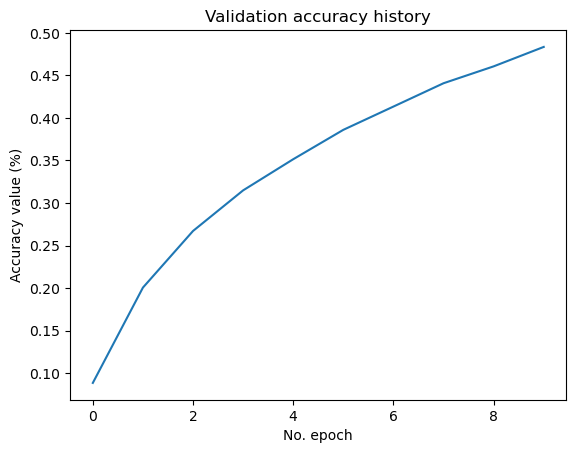

In [52]:
plt.plot(hist.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [53]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 2.6048 - accuracy: 0.3649 - 1s/epoch - 4ms/step


In [100]:
test_loss

2.6831319332122803

In [101]:
test_acc

0.34630000591278076

### Претренированная модель

Необходимо изменить размер изображений, т.к. MobileNetV2 не принимает изображения размером 32 на 32

In [54]:
func = lambda x : tf.image.resize(x,(128,128))

In [55]:
train_images = tf.py_function(func, [train_images], tf.float32)

In [56]:
test_images = tf.py_function(func, [test_images], tf.float32)

In [57]:
train_images.shape

TensorShape([50000, 128, 128, 3])

In [58]:
model = Sequential()
model.add(tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape = (128, 128, 3),
    include_top=False,
    weights='imagenet',
    classes=100
))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

In [59]:
model.layers[0].trainable = False

In [60]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 20480)             0         
                                                                 
 dense_11 (Dense)            (None, 256)               5243136   
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 100)               12900     
                                                                 
Total params: 7,546,916
Trainable params: 5,288,932
Non-trainable params: 2,257,984
____________________________________

In [61]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
              )

In [62]:
train_images

<tf.Tensor: shape=(50000, 128, 128, 3), dtype=float32, numpy=
array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7284314 , 0.7754902 , 0.6730392 ],
         [0.7137255 , 0.7607843 , 0.654902  ],
         [0.7137255 , 0.7607843 , 0.654902  ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7284314 , 0.7754902 , 0.6730392 ],
         [0.7137255 , 0.7607843 , 0.654902  ],
         [0.7137255 , 0.7607843 , 0.654902  ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.9999387 , 0.9999387 , 0.9999387 ],
         ...,
         [0.7098652 , 0.754902  , 0.6453431 ],
         [0.6960784 , 0.7411765 , 0.6284314 ],
         [0.6960784 , 0.7411765 , 0.6284314 ]],

        ...,

        [[0.35833335, 0.495588

In [63]:
hist = model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 196s 121ms/step - loss: 2.7034 - accuracy: 0.3301
Epoch 2/10
1563/1563 [==============================] - 192s 123ms/step - loss: 1.8526 - accuracy: 0.4923
Epoch 3/10
1563/1563 [==============================] - 189s 121ms/step - loss: 1.5594 - accuracy: 0.5602
Epoch 4/10
1563/1563 [==============================] - 192s 123ms/step - loss: 1.3417 - accuracy: 0.6145
Epoch 5/10
1563/1563 [==============================] - 185s 118ms/step - loss: 1.1528 - accuracy: 0.6604
Epoch 6/10
1563/1563 [==============================] - 182s 116ms/step - loss: 0.9981 - accuracy: 0.7019
Epoch 7/10
1563/1563 [==============================] - 182s 116ms/step - loss: 0.8673 - accuracy: 0.7357
Epoch 8/10
1563/1563 [==============================] - 184s 117ms/step - loss: 0.7535 - accuracy: 0.7717
Epoch 9/10
1563/1563 [==============================] - 184s 118ms/step - loss: 0.6715 - accuracy: 0.7923
Epoch 10/10
1563/1563 [=======================

In [64]:
hist.history

{'loss': [2.703416347503662,
  1.852613925933838,
  1.5594173669815063,
  1.3417412042617798,
  1.1528407335281372,
  0.9980923533439636,
  0.8673474192619324,
  0.753493070602417,
  0.6715361475944519,
  0.6018881797790527],
 'accuracy': [0.33009999990463257,
  0.4922800064086914,
  0.5601599812507629,
  0.6144800186157227,
  0.6603999733924866,
  0.7019199728965759,
  0.7357199788093567,
  0.7717199921607971,
  0.7922999858856201,
  0.8112800121307373]}

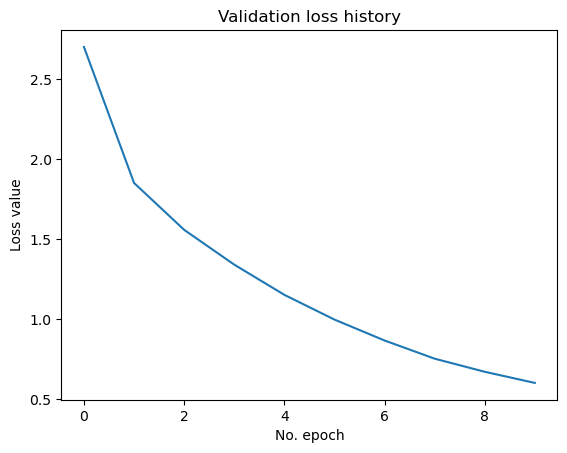

In [65]:
plt.plot(hist.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

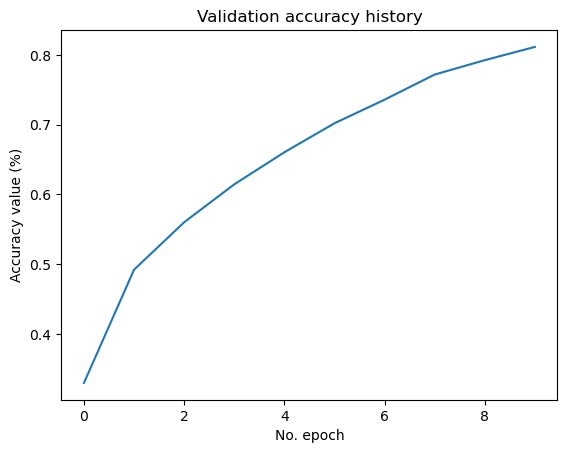

In [66]:
plt.plot(hist.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [67]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 26s - loss: 2.9331 - accuracy: 0.4746 - 26s/epoch - 83ms/step
